<a href="https://colab.research.google.com/github/suhanaafreen24/first-project/blob/main/Codealpha_task_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       190
           1       1.00      0.80      0.89        10

    accuracy                           0.99       200
   macro avg       0.99      0.90      0.94       200
weighted avg       0.99      0.99      0.99       200


Feature Importance:
                  feature  importance
3   debt_to_income_ratio    0.270555
5      previous_defaults    0.235537
1                 income    0.221135
2       employment_years    0.172643
0                    age    0.053268
4  credit_history_length    0.046862


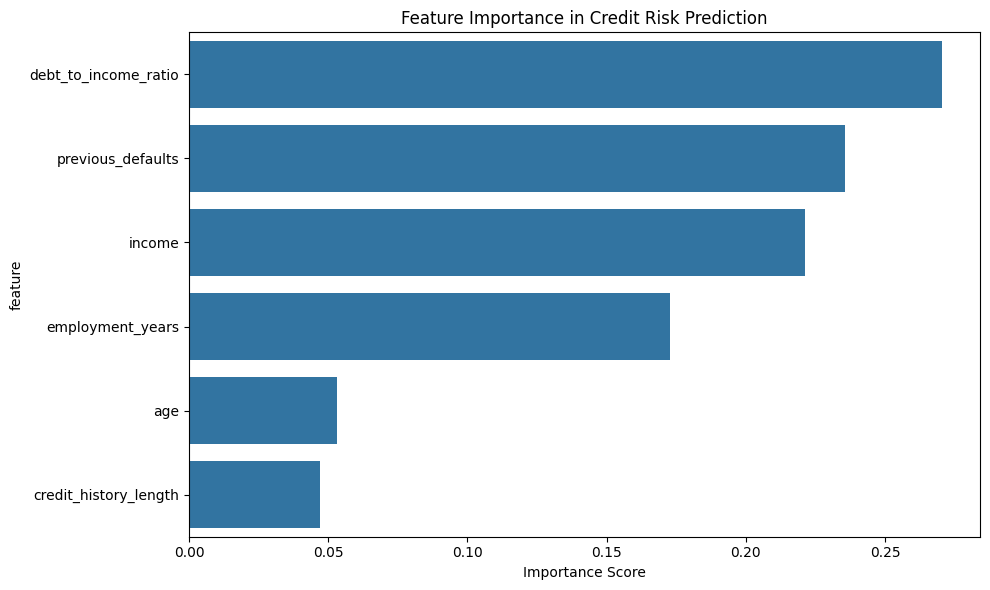

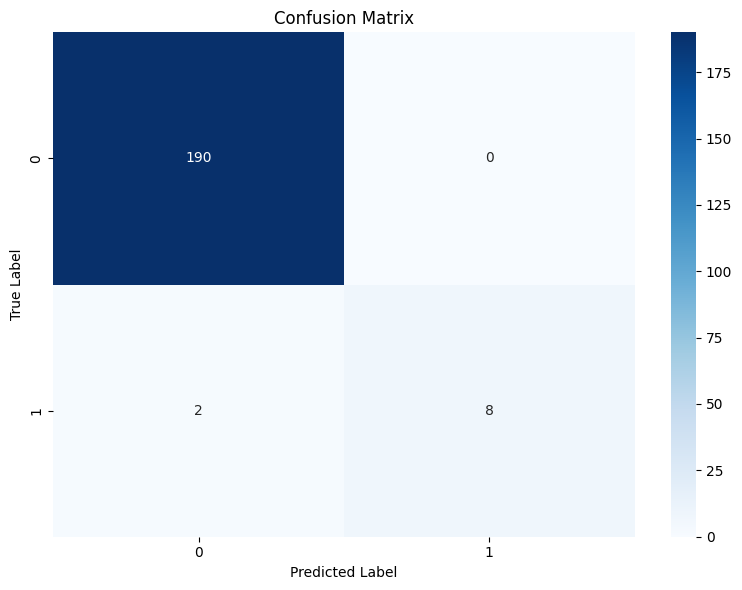

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Synthetic Credit Scoring Dataset
def generate_credit_data(n_samples=1000):
    np.random.seed(42)
    data = {
        'age': np.random.randint(22, 65, n_samples),
        'income': np.random.randint(20000, 150000, n_samples),
        'employment_years': np.random.randint(0, 20, n_samples),
        'debt_to_income_ratio': np.random.uniform(0.1, 0.8, n_samples),
        'credit_history_length': np.random.randint(1, 20, n_samples),
        'previous_defaults': np.random.randint(0, 3, n_samples)
    }

    df = pd.DataFrame(data)

    # Credit risk scoring logic
    df['credit_risk'] = np.where(
        (df['income'] > 80000) &
        (df['employment_years'] > 5) &
        (df['debt_to_income_ratio'] < 0.4) &
        (df['previous_defaults'] == 0),
        1, 0  # 1 = Low Risk, 0 = High Risk
    )

    return df

# Generate dataset
credit_df = generate_credit_data()

# Prepare features and target
X = credit_df.drop('credit_risk', axis=1)
y = credit_df['credit_risk']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Model Evaluation
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)

# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Credit Risk Prediction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [ ]:
import librosa
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Predefined sample data (replace with actual audio features)
emotions = ['happy', 'sad', 'angry']
sample_features = np.random.rand(100, 40)
sample_labels = np.random.randint(0, len(emotions), 100)

# Prepare data
X = sample_features
y = tf.keras.utils.to_categorical(sample_labels, num_classes=len(emotions))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Model
model = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[2]), return_sequences=True),
    LSTM(32),
    Dense(len(emotions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=20, batch_size=16)

# Predict function
def predict_emotion(audio_features):
    features = audio_features.reshape(1, 1, -1)
    prediction = model.predict(features)
    return emotions[np.argmax(prediction)]

# Example usage
test_features = np.random.rand(1, 40)
print(f"Predicted Emotion: {predict_emotion(test_features)}")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4177 - loss: 1.0942
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3700 - loss: 1.0891 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3332 - loss: 1.0899  
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5300 - loss: 1.0802 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3967 - loss: 1.0770 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4089 - loss: 1.0758 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4233 - loss: 1.0716  
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4335 - loss: 1.0727 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5113 - loss: 1.0787 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5264 - loss: 1.0675 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5399 - loss: 1.0504 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5962 - loss: 1.0511  
Epoch 13/2

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values
X_train = X_train.reshape((60000, 28, 28, 1)) / 255.0
X_test = X_test.reshape((10000, 28, 28, 1)) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build CNN model
def create_character_recognition_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten and dense layers
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train model
model = create_character_recognition_model()
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Prediction function
def recognize_character(image):
    """
    Recognize handwritten character from image

    Args:
        image (numpy.ndarray): 28x28 grayscale image

    Returns:
        int: Predicted character/digit
    """
    # Preprocess image
    processed_image = image.reshape(1, 28, 28, 1) / 255.0

    # Predict
    prediction = model.predict(processed_image)
    return np.argmax(prediction)

# Example usage
def test_recognition():
    # Example test image (first test image)
    sample_image = X_test[0].reshape(28, 28)
    predicted_digit = recognize_character(sample_image)
    print(f"Predicted Digit: {predicted_digit}")
    print(f"Actual Digit: {np.argmax(y_test[0])}")

test_recognition()

# Save model
model.save('/content/handwritten_character_model.h5')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.7673 - loss: 0.7215 - val_accuracy: 0.9797 - val_loss: 0.0699
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.9513 - loss: 0.1566 - val_accuracy: 0.9836 - val_loss: 0.0541
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 57ms/step - accuracy: 0.9648 - loss: 0.1172 - val_accuracy: 0.9870 - val_loss: 0.0461
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9742 - loss: 0.0873 - val_accuracy: 0.9870 - val_loss: 0.0461
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9775 - loss: 0.0759 - val_accuracy: 0.9881 - val_loss: 0.0438
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9864 - loss: 0.0422
Test Accuracy: 98.89%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Predicted Digit: 0
Actual Digit: 7


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Simulated medical dataset
def generate_synthetic_medical_data():
    np.random.seed(42)
    symptoms = ['fever', 'cough', 'fatigue', 'chest_pain', 'breathing_difficulty']
    diseases = ['normal', 'pneumonia', 'covid', 'flu']

    data = []
    for _ in range(1000):
        # Synthetic data generation
        patient_data = {
            'age': np.random.randint(18, 80),
            'fever': np.random.randint(0, 2),
            'cough': np.random.randint(0, 2),
            'fatigue': np.random.randint(0, 2),
            'chest_pain': np.random.randint(0, 2),
            'breathing_difficulty': np.random.randint(0, 2)
        }

        # Simple probabilistic disease assignment based on symptoms
        if patient_data['breathing_difficulty'] and patient_data['chest_pain']:
            patient_data['disease'] = 'covid'
        elif patient_data['fever'] and patient_data['cough']:
            patient_data['disease'] = 'pneumonia'
        elif patient_data['fatigue'] and patient_data['fever']:
            patient_data['disease'] = 'flu'
        else:
            patient_data['disease'] = 'normal'

        data.append(patient_data)

    return pd.DataFrame(data)

# Generate synthetic dataset
df = generate_synthetic_medical_data()

# Prepare features and target
X = df.drop('disease', axis=1)
y = df['disease']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test_scaled)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Prediction function
def predict_disease(patient_symptoms):
    """
    Predict disease based on patient symptoms

    Args:
        patient_symptoms (dict): Patient symptom data

    Returns:
        str: Predicted disease
    """
    # Convert input to DataFrame
    patient_df = pd.DataFrame([patient_symptoms])

    # Scale features
    patient_scaled = scaler.transform(patient_df)

    # Predict
    prediction = classifier.predict(patient_scaled)
    probabilities = classifier.predict_proba(patient_scaled)

    return {
        'disease': prediction[0],
        'probabilities': dict(zip(classifier.classes_, probabilities[0]))
    }

# Example usage
sample_patient = {
    'age': 45,
    'fever': 1,
    'cough': 1,
    'fatigue': 1,
    'chest_pain': 0,
    'breathing_difficulty': 0
}

result = predict_disease(sample_patient)
print("\nPrediction:", result)

Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       covid       1.00      1.00      1.00        39
         flu       1.00      1.00      1.00        24
      normal       1.00      1.00      1.00        99
   pneumonia       1.00      1.00      1.00        38

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Prediction: {'disease': 'pneumonia', 'probabilities': {'covid': 0.0, 'flu': 0.01, 'normal': 0.0, 'pneumonia': 0.99}}
